# Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo

![DSA](imagens/projeto2.png)

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
df_dsa.shape

(9700, 11)

In [4]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [12]:
# Pegamos os registros cuja categoria foi de 'Office Supplies'
result_p1_1 = df_dsa[ df_dsa['Categoria'] == 'Office Supplies' ]

# Filtramos para agrupar os registros por cidade e mostrar a soma de dos registros de venda
result_p1_2 = result_p1_1.groupby('Cidade')['Valor_Venda'].sum()

# Agora que temos uma series, vamos pegar aquela que tem o maior valor
# Se usarmos max() vamos retornar o valor em si, porem o nome da cidade está no índice, logo usamos idxmax() 'indexmax'
print('A cidade que mais vendeu foi ' + result_p1_2.idxmax())

A cidade que mais vendeu foi New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [13]:
# vou ter que usar um value_counts, sendo o indice a data
result_p2_1 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
print(result_p2_1)

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
                ...    
31/10/2017    2346.5790
31/10/2018     523.9280
31/12/2015    5253.2700
31/12/2016    1381.3440
31/12/2017     731.7680
Name: Valor_Venda, Length: 1226, dtype: float64


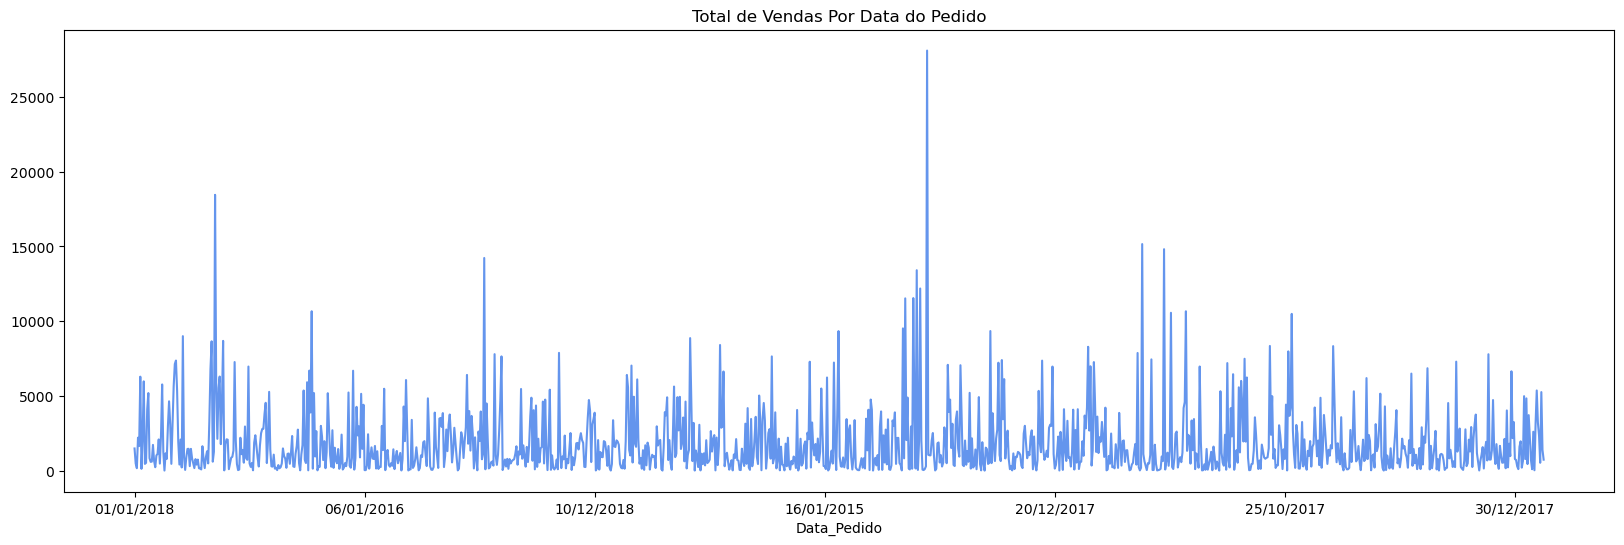

In [14]:
# Plotando o resultado em gráfico de barras
plt.figure(figsize = (20, 6))
result_p2_1.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'cornflowerblue')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [15]:
result_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
print(result_p3)

                  Estado  Valor_Venda
0                Alabama   19510.6400
1                Arizona   35272.6570
2               Arkansas   11673.8300
3             California  442927.0975
4               Colorado   31841.5980
5            Connecticut   13366.7370
6               Delaware   26452.5890
7   District of Columbia    2865.0200
8                Florida   88043.7000
9                Georgia   48083.1600
10                 Idaho    4292.5160
11              Illinois   78109.9270
12               Indiana   48718.4000
13                  Iowa    4443.5600
14                Kansas    2914.3100
15              Kentucky   36409.5800
16             Louisiana    9131.0500
17                 Maine    1270.5300
18              Maryland   23705.5230
19         Massachusetts   27363.2640
20              Michigan   76081.1740
21             Minnesota   29863.1500
22           Mississippi   10771.3400
23              Missouri   22205.1500
24               Montana    5589.3520
25          

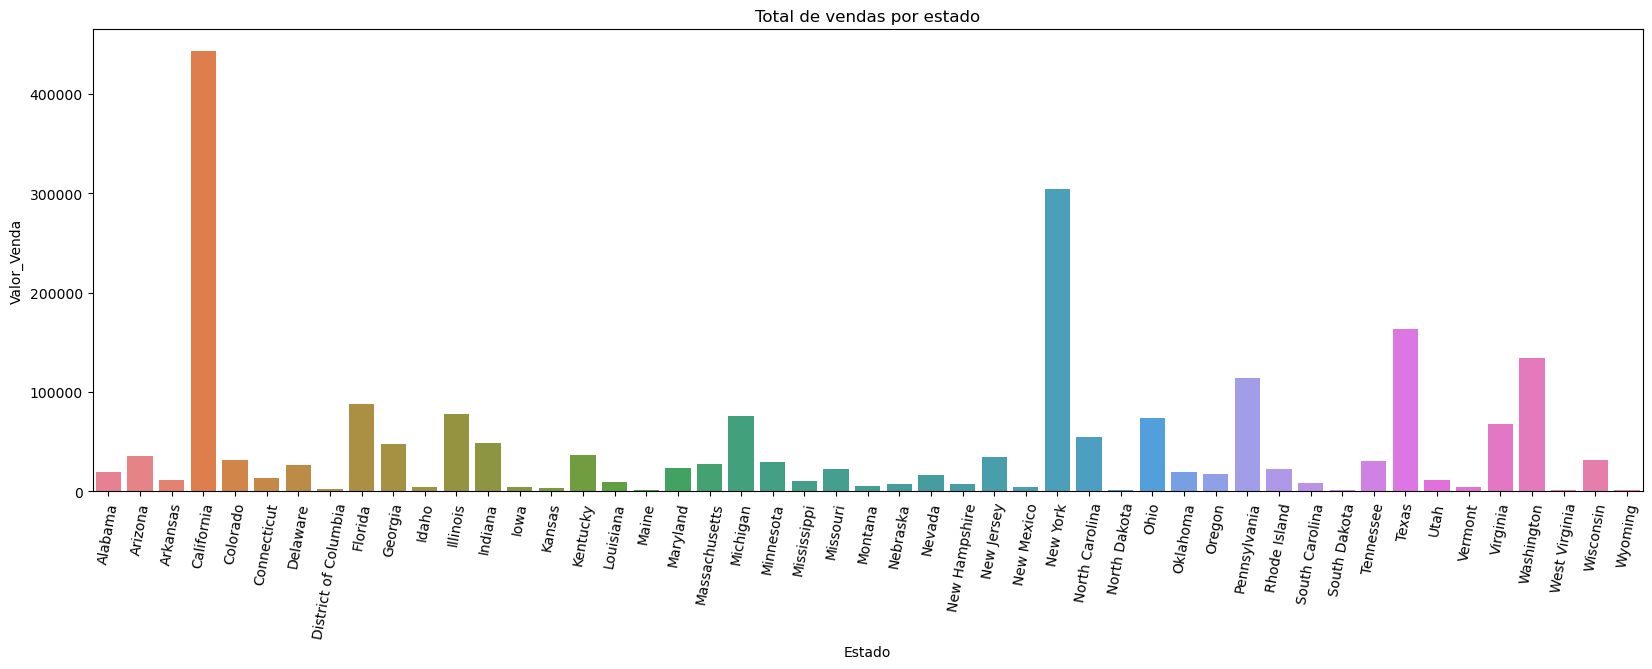

In [16]:
# Plotando o resultado
plt.figure(figsize = (20, 6))
sns.barplot(data = result_p3, x = 'Estado', y = 'Valor_Venda', hue = 'Estado')
plt.title('Total de vendas por estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [17]:
# O groupby() retorna uma series (um pedaço de dataframe)
# Usamos o reset index para mostrar como um dataframe e nao como Series
result_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum() \
                  .reset_index() \
                  .sort_values(by = 'Valor_Venda', ascending = False) \
                  .head(10)

result_p4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


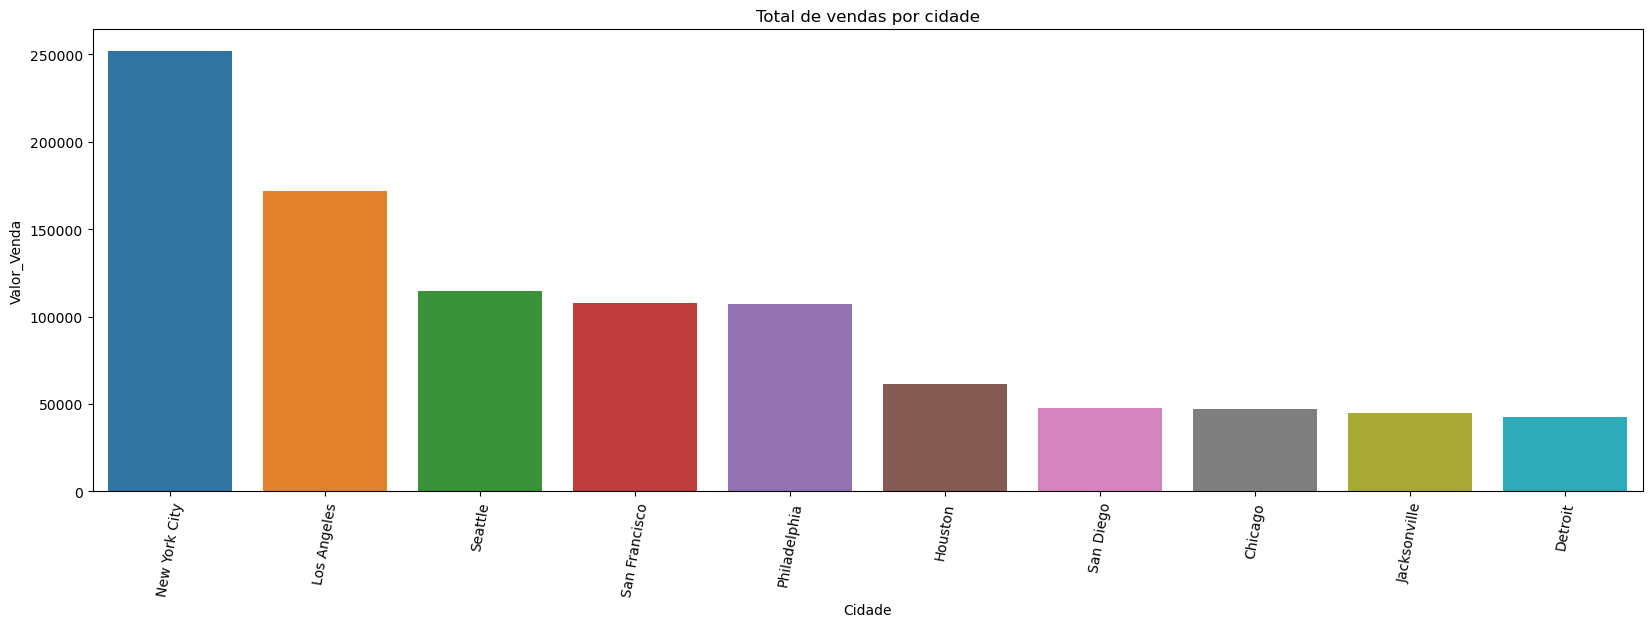

In [18]:
plt.figure(figsize = (20, 6))
sns.barplot(data = result_p4, x = 'Cidade', y = 'Valor_Venda', hue = 'Cidade')
plt.title('Total de vendas por cidade')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [31]:
result_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum() \
            .reset_index() \
            .sort_values(by = 'Valor_Venda', ascending = False) \
            .head()

# result_p5['Valor_Venda'] = result_p5['Valor_Venda'] / 1_000_000
result_p5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [44]:
def auto_percent(all_data):
    def my_format(percent):
        total = sum(all_data)
        value = int((percent * total) / 100)
        return 'US$ {v:d}'.format(v = value)

    return my_format


<function auto_percent.<locals>.my_format at 0x11e813100>


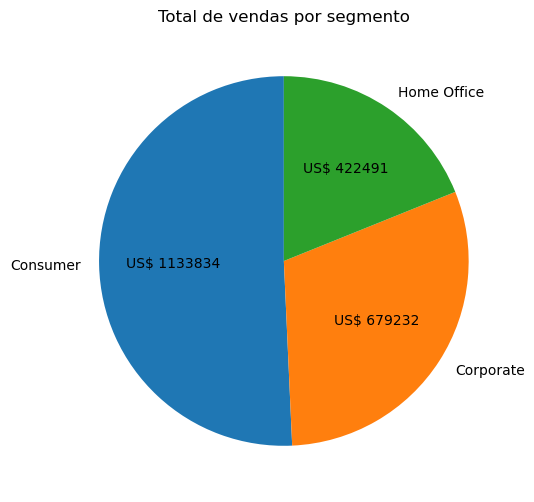

In [45]:
plt.figure(figsize = (20, 6))
plt.pie(
    result_p5['Valor_Venda'], 
    autopct = auto_percent(result_p5['Valor_Venda']), 
    labels = result_p5['Segmento'], 
    startangle = 90
)
plt.title('Total de vendas por segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [57]:
df_dsa['Ano'] = df_dsa['Data_Pedido'].str[6:]

result_p6 = df_dsa[['Segmento', 'Ano', 'Valor_Venda']].groupby(['Segmento', 'Ano']).sum()
result_p6

Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

# Fim